In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ============================================================
# FUNCIONES GENERALES
# ============================================================

def cargar_datos(nombre_csv):
    """Carga los datos desde un archivo CSV sin cabeceras."""
    datos = pd.read_csv(nombre_csv, header=None, names=["x", "y"])
    X = datos["x"].values.reshape(-1, 1)
    y = datos["y"].values.reshape(-1, 1)
    return X, y

def funcion_costo(X, y, theta):
    """Calcula el coste J(theta)."""
    m = len(y)
    return (1 / (2 * m)) * np.sum((X @ theta - y) ** 2)

# ============================================================
# FUNCIÓN DE REPRESENTACIÓN GRÁFICA
# ============================================================

def representar_resultados(X, y, thetas, etiquetas, predicciones=None):
    """
    Muestra los datos originales y, opcionalmente, las rectas de hipótesis.
    
    Parámetros:
    - X, y: datos originales
    - thetas: lista de coeficientes (θ) [opcional si se usa 'predicciones']
    - etiquetas: lista de nombres para cada modelo
    - predicciones: lista opcional de arrays con valores predichos.
      Si es None o vacío, se calcularán internamente usando θ.
      Si contiene valores, se usarán directamente.
    """
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color="blue", alpha=0.7, label="Datos reales")

    x_vals = np.linspace(min(X), max(X), 100).reshape(-1, 1)

    for i, label in enumerate(etiquetas):
        # Si hay predicciones personalizadas y válidas, las usamos
        if predicciones and predicciones[i] is not None and len(predicciones[i]) > 0:
            y_pred = predicciones[i]
        # Si no hay predicciones, las calculamos con θ
        elif thetas and thetas[i] is not None:
            X_pred = np.hstack((np.ones_like(x_vals), x_vals))
            y_pred = X_pred @ thetas[i]
        else:
            continue  # No hay nada que mostrar para este modelo

        plt.plot(x_vals, y_pred, label=label)

    plt.title("Comparación de métodos de regresión lineal")
    plt.xlabel("Población (miles)")
    plt.ylabel("Beneficio (miles $)")
    plt.legend()
    plt.grid(True)
    plt.show()



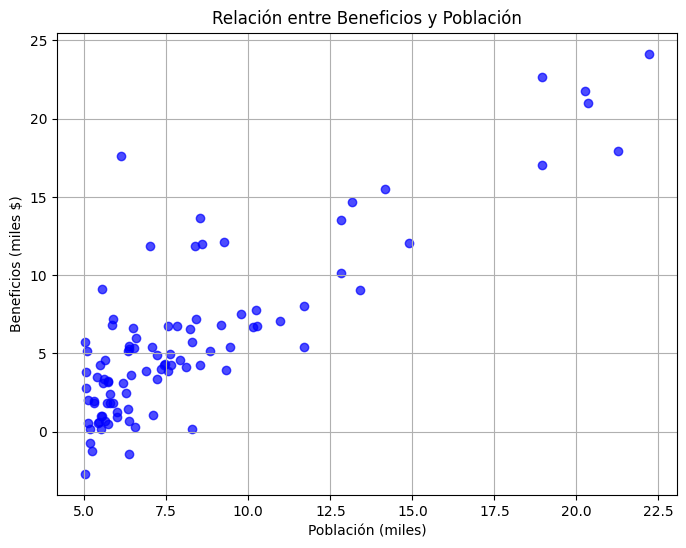

In [16]:
# ============================================================
# VISUALIZACIÓN INICIAL DE LOS DATOS
# ============================================================

def representar_datos(nombre_csv):
    """
    Lee los datos de un archivo CSV y muestra la relación entre población y beneficios.
    """
    # Cargar los datos usando la función genérica
    X, y = cargar_datos(nombre_csv)

    # Crear la gráfica
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color="blue", marker="o", alpha=0.7)

    # Etiquetas y título
    plt.title("Relación entre Beneficios y Población")
    plt.xlabel("Población (miles)")
    plt.ylabel("Beneficios (miles $)")
    plt.grid(True)
    plt.show()

# ============================================================
# LLAMADA A LA FUNCIÓN
# ============================================================

representar_datos("regresion_1.csv")


Coeficiente (pendiente): 1.1930
Término independiente (intercepto): -3.8958


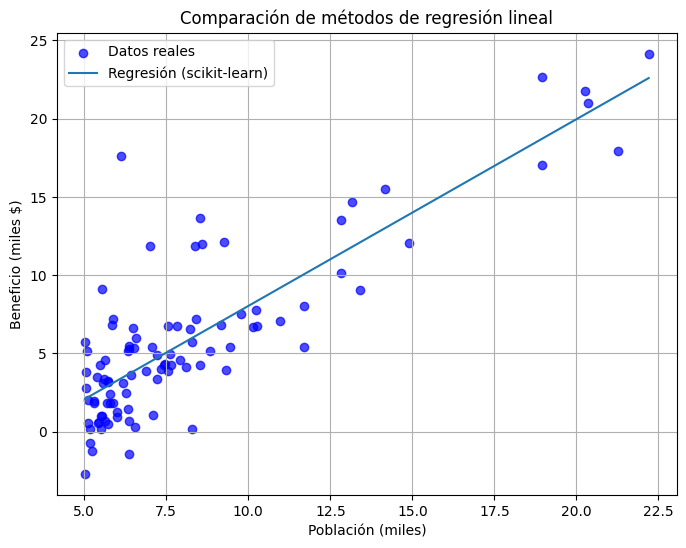

In [17]:
#EJ2

def regresion_sklearn(nombre_csv):
    """Aplica regresión lineal con scikit-learn y muestra los resultados."""
    # --- Leer los datos ---
    X, y = cargar_datos(nombre_csv)

    # --- Crear y entrenar el modelo ---
    modelo = LinearRegression()
    modelo.fit(X, y)

    # --- Obtener coeficientes ---
    pendiente = modelo.coef_[0][0]
    intercepto = modelo.intercept_[0]

    print(f"Coeficiente (pendiente): {pendiente:.4f}")
    print(f"Término independiente (intercepto): {intercepto:.4f}")

    # --- Crear θ en formato matricial para coherencia con otros métodos ---
    theta = np.array([[intercepto], [pendiente]])

    # --- Representar resultados ---
    representar_resultados(X, y, [theta], ["Regresión (scikit-learn)"])

    return theta

theta_sklearn = regresion_sklearn("regresion_1.csv")


Coeficiente (pendiente): 1.1930
Término independiente (intercepto): -3.8958


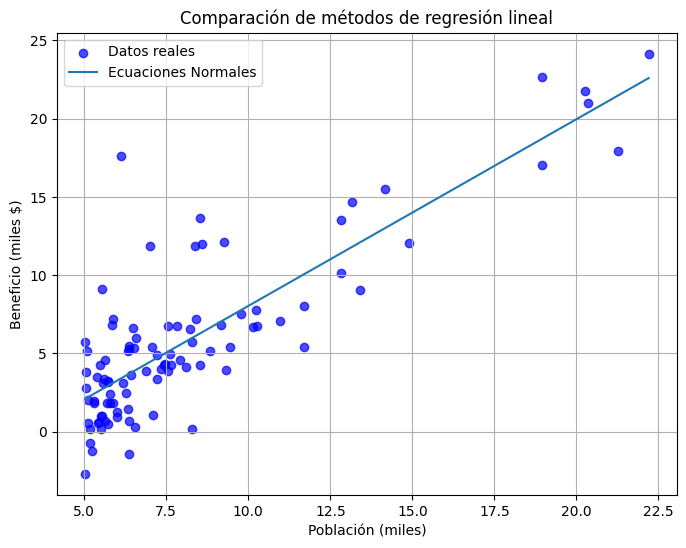

In [18]:
#EJ3


def ecuaciones_normales(X, y):
    """Calcula θ usando la solución analítica (XᵀX)⁻¹Xᵀy."""
    X_matriz = np.hstack((np.ones_like(X), X))  # Añade columna de 1s
    theta = np.linalg.inv(X_matriz.T @ X_matriz) @ X_matriz.T @ y
    return theta


def regresion_ecuaciones_normales(nombre_csv):
    """Aplica la fórmula analítica y muestra la recta ajustada."""
    X, y = cargar_datos(nombre_csv)
    theta = ecuaciones_normales(X, y)

    intercepto = theta[0, 0]
    pendiente = theta[1, 0]

    print(f"Coeficiente (pendiente): {pendiente:.4f}")
    print(f"Término independiente (intercepto): {intercepto:.4f}")

    representar_resultados(X, y, [theta], ["Ecuaciones Normales"])
    return theta

# ============================================================
# LLAMADA A LA FUNCIÓN
# ============================================================

theta_normales = regresion_ecuaciones_normales("regresion_1.csv")



Coeficiente (pendiente): 1.1631
Término independiente (intercepto): -3.5976


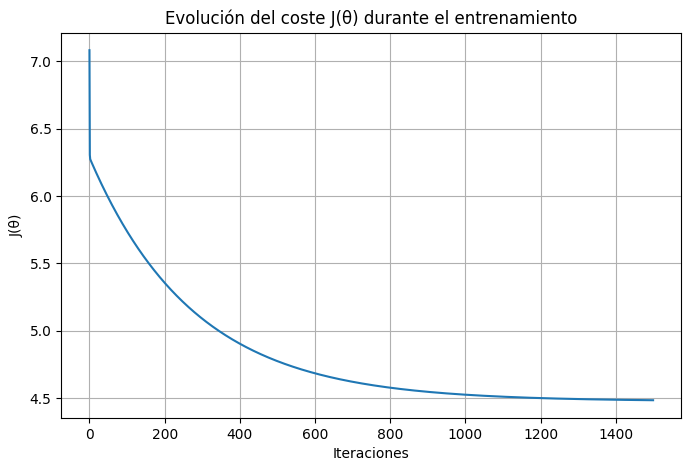

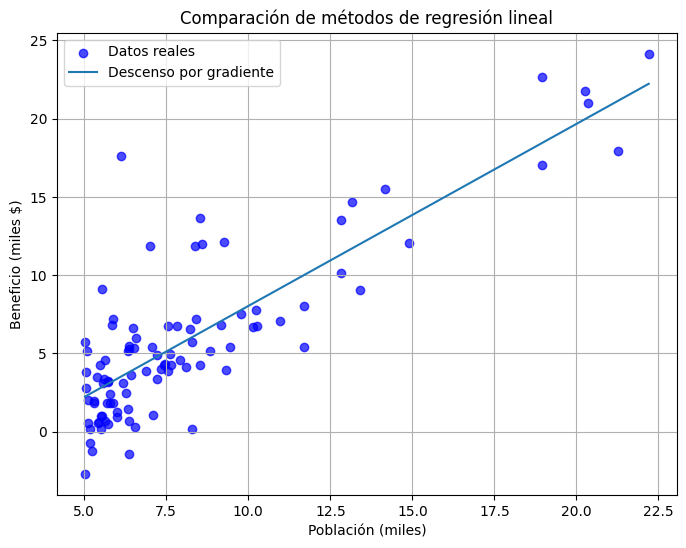

In [19]:
# ============================================================
# EJERCICIOS 4 y 5 — Descenso por gradiente clásico
# ============================================================

def descenso_gradiente(X, y, alpha=0.01, iteraciones=1500):
    """Aplica descenso por gradiente clásico para regresión lineal."""
    m = len(y)
    X_matriz = np.hstack((np.ones_like(X), X))
    theta = np.random.randn(2, 1)
    historial_coste = []

    for _ in range(iteraciones):
        gradiente = (1 / m) * X_matriz.T @ (X_matriz @ theta - y)
        theta -= alpha * gradiente
        historial_coste.append(funcion_costo(X_matriz, y, theta))

    return theta, historial_coste


def regresion_gradiente(nombre_csv, alpha=0.01, iteraciones=1500):
    """Ejecuta el descenso por gradiente y representa resultados."""
    # --- Cargar datos ---
    X, y = cargar_datos(nombre_csv)

    # --- Entrenar modelo ---
    theta, historial_coste = descenso_gradiente(X, y, alpha, iteraciones)

    # --- Coeficientes finales ---
    intercepto = theta[0, 0]
    pendiente = theta[1, 0]
    print(f"Coeficiente (pendiente): {pendiente:.4f}")
    print(f"Término independiente (intercepto): {intercepto:.4f}")

    # --- Representar evolución del coste ---
    plt.figure(figsize=(8,5))
    plt.plot(range(iteraciones), historial_coste)
    plt.title("Evolución del coste J(θ) durante el entrenamiento")
    plt.xlabel("Iteraciones")
    plt.ylabel("J(θ)")
    plt.grid(True)
    plt.show()

    # --- Representar resultados finales ---
    representar_resultados(X, y, [theta], ["Descenso por gradiente"])

    return theta, historial_coste


# ============================================================
# LLAMADA 
# ============================================================

theta_gradiente, historial = regresion_gradiente("regresion_1.csv", alpha=0.01, iteraciones=1500)


Coeficiente (pendiente): 1.1680
Término independiente (intercepto): -3.3834


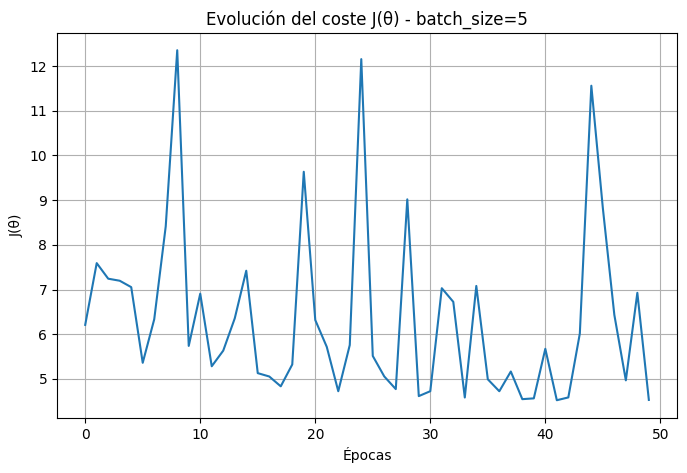

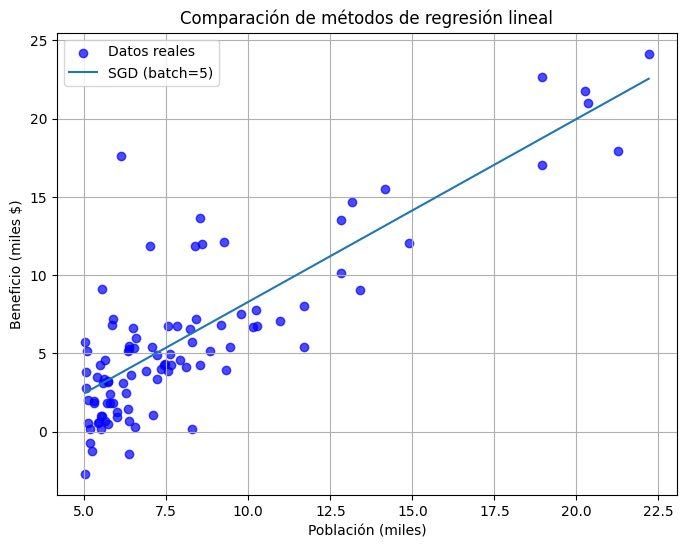

In [20]:
# ============================================================
# EJERCICIOS 6 y 7 — Descenso por gradiente estocástico (mini-batch)
# ============================================================

def descenso_gradiente_estocastico(X, y, alpha=0.01, batch_size=5, epochs=50):
    """Aplica descenso por gradiente estocástico (mini-batch)."""
    m = len(y)
    X_matriz = np.hstack((np.ones_like(X), X))
    theta = np.random.randn(2, 1)
    historial_coste = []

    for epoch in range(epochs):
        # Barajar los datos
        indices = np.random.permutation(m)
        X_shuffled = X_matriz[indices]
        y_shuffled = y[indices]

        # Procesar los datos por lotes (mini-batch)
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            gradiente = (1 / len(X_batch)) * X_batch.T @ (X_batch @ theta - y_batch)
            theta -= alpha * gradiente

        # Guardar el coste tras cada época
        historial_coste.append(funcion_costo(X_matriz, y, theta))

    return theta, historial_coste


def regresion_sgd(nombre_csv, alpha=0.01, batch_size=5, epochs=50):
    """Ejecuta descenso por gradiente estocástico y muestra resultados."""
    # --- Cargar datos ---
    X, y = cargar_datos(nombre_csv)

    # --- Entrenar modelo ---
    theta, historial_coste = descenso_gradiente_estocastico(X, y, alpha, batch_size, epochs)

    # --- Coeficientes finales ---
    intercepto = theta[0, 0]
    pendiente = theta[1, 0]
    print(f"Coeficiente (pendiente): {pendiente:.4f}")
    print(f"Término independiente (intercepto): {intercepto:.4f}")

    # --- Representar evolución del coste ---
    plt.figure(figsize=(8,5))
    plt.plot(range(epochs), historial_coste)
    plt.title(f"Evolución del coste J(θ) - batch_size={batch_size}")
    plt.xlabel("Épocas")
    plt.ylabel("J(θ)")
    plt.grid(True)
    plt.show()

    # --- Representar resultados finales ---
    representar_resultados(X, y, [theta], [f"SGD (batch={batch_size})"])

    return theta, historial_coste


# ============================================================
# LLAMADA AL PROGRAMA
# ============================================================

if __name__ == "__main__":
    theta_sgd, historial_sgd = regresion_sgd("regresion_1.csv", alpha=0.01, batch_size=5, epochs=50)


In [23]:
#EJ8

def predecir(theta, x_val):
    """Predice el valor de salida dado θ y una entrada x."""
    X_pred = np.vstack((np.ones_like(x_val), x_val)).T
    return X_pred @ theta

Theta Sklearn: [-3.89578088  1.19303364]
Theta Normales: [-3.89578088  1.19303364]
Theta Gradiente: [-3.59758595  1.16307673]
Theta Estocastico: [-3.38335384  1.16801064]


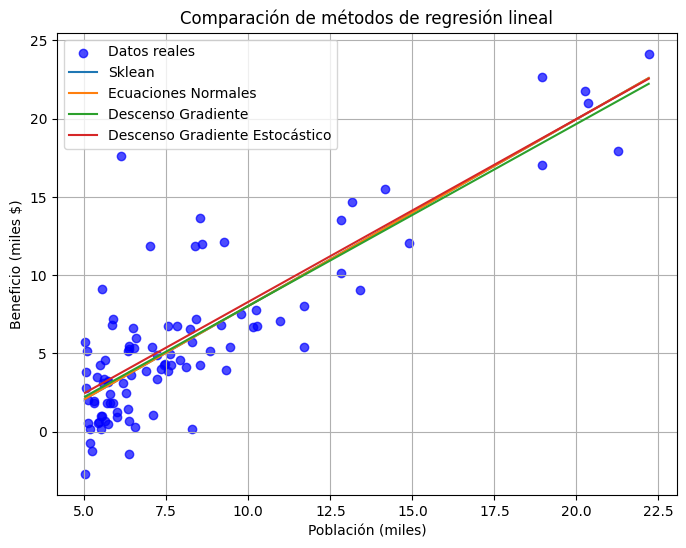

In [28]:
# ============================================================
# EJERCICIO 9 — Comparación gráfica de los tres métodos
# ============================================================

# Supongamos que ya tenemos los θ calculados previamente:
# theta_normales, theta_gradiente, theta_sgd

# Cargar los datos
X, y = cargar_datos("regresion_1.csv")

# Lista de θ y etiquetas
thetas = [theta_sklearn, theta_normales, theta_gradiente, theta_sgd]
print("Theta Sklearn:", theta_sklearn.flatten())
print("Theta Normales:", theta_normales.flatten())
print("Theta Gradiente:", theta_gradiente.flatten())
print("Theta Estocastico:", theta_sgd.flatten())

etiquetas = ["Sklean","Ecuaciones Normales", "Descenso Gradiente", "Descenso Gradiente Estocástico"]

# Representar los resultados usando la función de predicción genérica
representar_resultados(X, y, thetas, etiquetas)


In [29]:
# ------------------------------
# Ejercicio 10: Predicción para población = 9.5
# ------------------------------
x_test = np.array([9.5])
print("Predicción de beneficio para población = 9.5 (miles habitantes):")
for t, label in zip(thetas, etiquetas):
    y_pred = predecir(t, x_test)
    print(f"{label}: {y_pred[0,0]:.4f} miles $")

Predicción de beneficio para población = 9.5 (miles habitantes):
Sklean: 7.4380 miles $
Ecuaciones Normales: 7.4380 miles $
Descenso Gradiente: 7.4516 miles $
Descenso Gradiente Estocástico: 7.7127 miles $


In [ ]:
#EJ11

In [ ]:
#EJ12